In [58]:
#importing all the models and functions from packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [59]:
#reaing train and test data
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
train.head()

,Origin Airport Code,Destination Airport Code,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Great Circle Distance,Timezone Difference,Continent Origin,Continent Destination,Route Popularity,Flight_Distance
0,ORG754,DST883,-0.283823,-43.312707,38.508357,24.024226,8076.863942,1,South America,Europe,397,8120.606391
1,ORG301,DST627,25.954354,82.253018,40.630074,145.859627,6000.224245,11,Asia,Asia,650,5998.108994
2,ORG501,DST681,1.386828,-81.540082,1.265511,82.773779,18246.263830,9,South America,Asia,655,18207.572270
3,ORG310,DST812,23.367517,34.904649,-24.384679,121.948601,10777.984860,-2,Africa,Australia,740,10813.850260
4,ORG608,DST878,3.328282,-16.364917,40.396593,45.871911,7442.778451,-2,Africa,Asia,173,7426.288895


In [60]:
train.shape

(19800, 12)

In [61]:
train.isnull().sum() #checking null value of train data

Origin Airport Code         0
Destination Airport Code    0
Origin Latitude             0
Origin Longitude            0
Destination Latitude        0
Destination Longitude       0
Great Circle Distance       0
Timezone Difference         0
Continent Origin            0
Continent Destination       0
Route Popularity            0
Flight_Distance             0
dtype: int64

In [62]:
test.isnull().sum() #checking null value of test data

Origin Airport Code           0
Destination Airport Code      0
Origin Latitude               0
Origin Longitude              0
Destination Latitude          0
Destination Longitude         0
Great Circle Distance         0
Timezone Difference           0
Continent Origin              0
Continent Destination         0
Route Popularity              0
Flight_Distance             200
dtype: int64

In [63]:
print(train.shape) #checking the shape of train data
print(test.shape) #checking the shape of test data

(19800, 12)
(200, 12)


In [64]:
#considering only the required features for train data
columns=['Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Great Circle Distance','Route Popularity']
X_train=train[columns]
#seperating target variable from train dataset
y_train=train[['Flight_Distance']]
#considering only the required features for test data
X_test=test[columns]
#seperating target variable from test dataset
y_test=test[['Flight_Distance']]
print(X_train.head())
print(y_train.head())

   Origin Latitude  Origin Longitude  Destination Latitude  \
0        -0.283823        -43.312707             38.508357   
1        25.954354         82.253018             40.630074   
2         1.386828        -81.540082              1.265511   
3        23.367517         34.904649            -24.384679   
4         3.328282        -16.364917             40.396593   

   Destination Longitude  Great Circle Distance  Route Popularity  
0              24.024226            8076.863942               397  
1             145.859627            6000.224245               650  
2              82.773779           18246.263830               655  
3             121.948601           10777.984860               740  
4              45.871911            7442.778451               173  
   Flight_Distance
0      8120.606391
1      5998.108994
2     18207.572270
3     10813.850260
4      7426.288895


In [65]:
#seperating features and target variables for train data
X=train[columns] 
y=train[['Flight_Distance']]
#splitting the train data as train and validation dataset with 80% as training data and 20% as validation data
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
#seperating features and target variables for validation data
X_val=X_val[columns]
y_val=y_val[['Flight_Distance']]

print(y_val.head())

       Flight_Distance
13795     10280.329420
3240       3119.945571
4054      14326.358320
19296     13743.120170
962        7064.449700


In [66]:
#parameters of model(i.e. RandomForestRegressor)
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

#Defining RandomForestRegressor model
model=LinearRegression()#criterion='squared_error')
#Defining GridSearchCV tool with estimator, param_grid, cv, njobs as parameters
#model -> model used for hyperparameter tuning
#param_grid -> parameters of model with various values as list for tuning
#cv -> cross validation of data i.e. no. of folds
#n_jobs -> no of cores used for hyperparameter tuning (n_jobs=-1 signifies using all the cores)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1)


In [67]:
import numpy as np
grid.fit(X_train,y_train) #fitting the training data with gridsearchcv tool [target variable must be passsed as 1D-array. 
#Ravel is used to flatten a multidimensional into a 1D-array]
best_parameters=grid.best_params_ # after multiple combinations of paramters passed gridsearchcv gives the best parameters suited for the model
print(best_parameters)

{'fit_intercept': False, 'positive': True}


In [68]:
best_grid=grid.best_estimator_ #stores the best parameters of the model after training dataset in to the attribute and used during predicting
print(best_grid) 
pred=best_grid.predict(X_val) #predicting the validation data with the best parameters of the model
pred=pd.DataFrame(pred) # transforming the predicted target variable into a dataframe
accuracy=mean_absolute_error(y_val,pred) #calculating the mean_absolute_error of the actual target variable and predicted variable
print(accuracy)

LinearRegression(fit_intercept=False, positive=True)
24.817799214175064


In [69]:
best_grid #stores the model with the best parameters

LinearRegression(fit_intercept=False, positive=True)

In [70]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_val,pred))
print(mean_squared_error(y_val,pred))
print(mean_absolute_error(y_val,pred))

0.9999590494874845
824.3020540815384
24.817799214175064


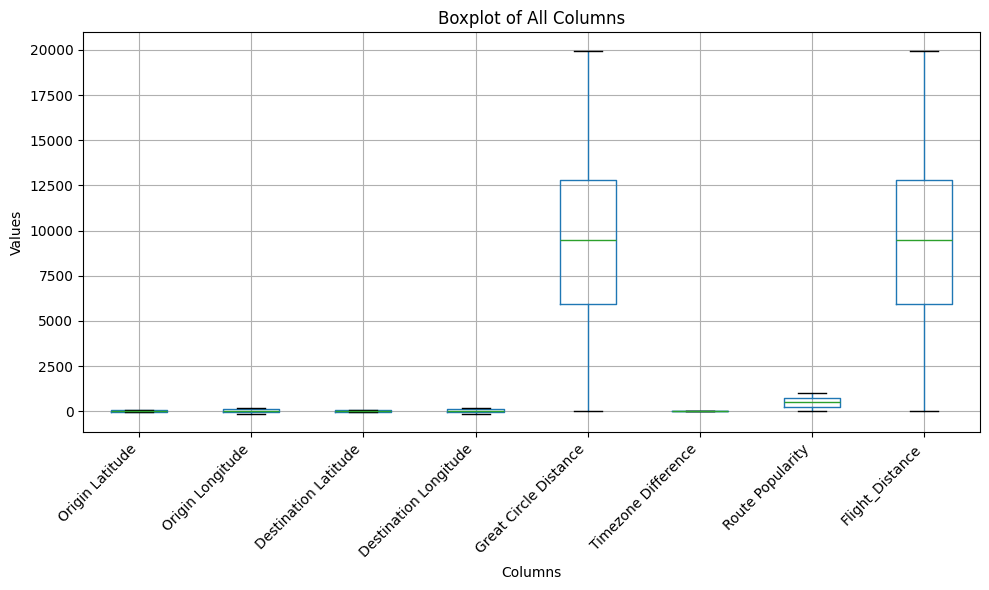

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.boxplot(data=train,x='Great Circle Distance',y='Flight_Distance')
#plt.show()

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
train.boxplot()

# Customize the plot (optional)
plt.title('Boxplot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.show()

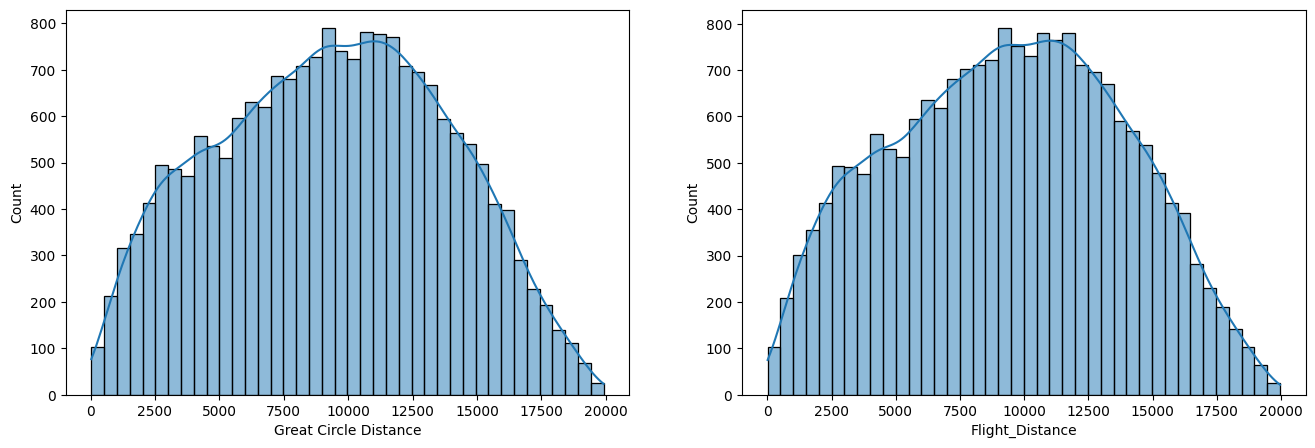

In [72]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(train['Great Circle Distance'], kde=True)

plt.subplot(1,2,2)
sns.histplot(train['Flight_Distance'], kde=True)

plt.show()

<Axes: >

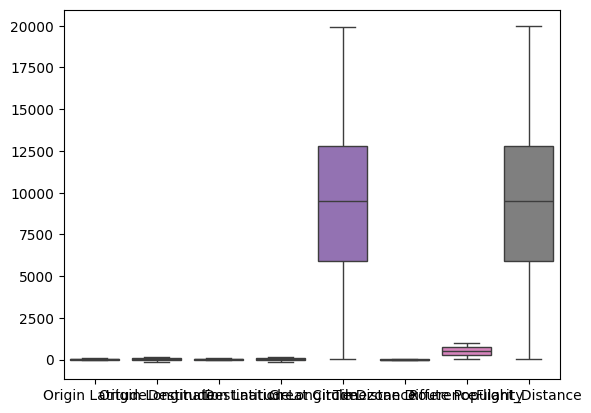

In [73]:
sns.boxplot(data =train)

In [74]:
#remove outliers

"""for col in ['Great Circle Distance']:
    Q1=train[col].quantile(0.25)
    Q3=train[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    train=train[(train[col]>=Q1)&(train[col]<=Q3)]
print(train.shape)"""
#train.head()

"for col in ['Great Circle Distance']:\n    Q1=train[col].quantile(0.25)\n    Q3=train[col].quantile(0.75)\n    IQR=Q3-Q1\n    lower_bound=Q1-1.5*IQR\n    upper_bound=Q3+1.5*IQR\n    train=train[(train[col]>=Q1)&(train[col]<=Q3)]\nprint(train.shape)"

In [75]:
train.describe()

,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Great Circle Distance,Timezone Difference,Route Popularity,Flight_Distance
count,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000
mean,13.028959,15.510501,12.828559,16.015789,9381.925584,-0.019949,500.831364,9381.825044
std,34.568745,87.097157,34.759755,87.635427,4465.510407,7.244641,289.370306,4465.911625
min,-54.960126,-169.997474,-54.958503,-169.979246,27.852369,-12.000000,1.000000,12.374404
25%,-18.519178,-55.595058,-18.703066,-54.926946,5921.496173,-6.000000,249.000000,5918.139295
50%,15.935886,15.594596,15.594577,15.700158,9489.546474,0.000000,502.000000,9489.917386
75%,43.835839,96.294855,43.798860,99.674920,12789.827235,6.000000,751.000000,12795.005312
max,69.998685,159.985565,69.997400,159.984764,19916.009680,12.000000,1000.000000,19963.921530


In [76]:
test_predict=best_grid.predict(X_test) #predicting the test data with the best parameters of the model
y_test=pd.DataFrame(test_predict,columns=['Flight_Distance']) # transforming the predicted target variable into a dataframe
#y_test.to_csv('Submission1.csv',index=False) #storing the predicted variable in the dataset
print("Done")

Done


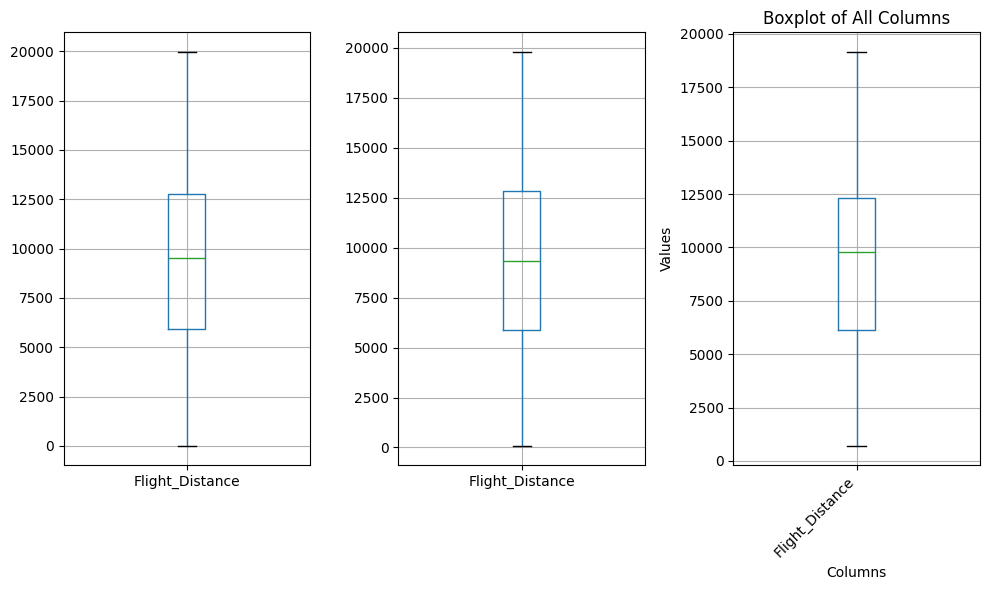

In [77]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.subplot(1,3,1)
y_train.boxplot()
plt.subplot(1,3,2)
y_val.boxplot()
plt.subplot(1,3,3)
y_test.boxplot()

# Customize the plot (optional)
plt.title('Boxplot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.show()

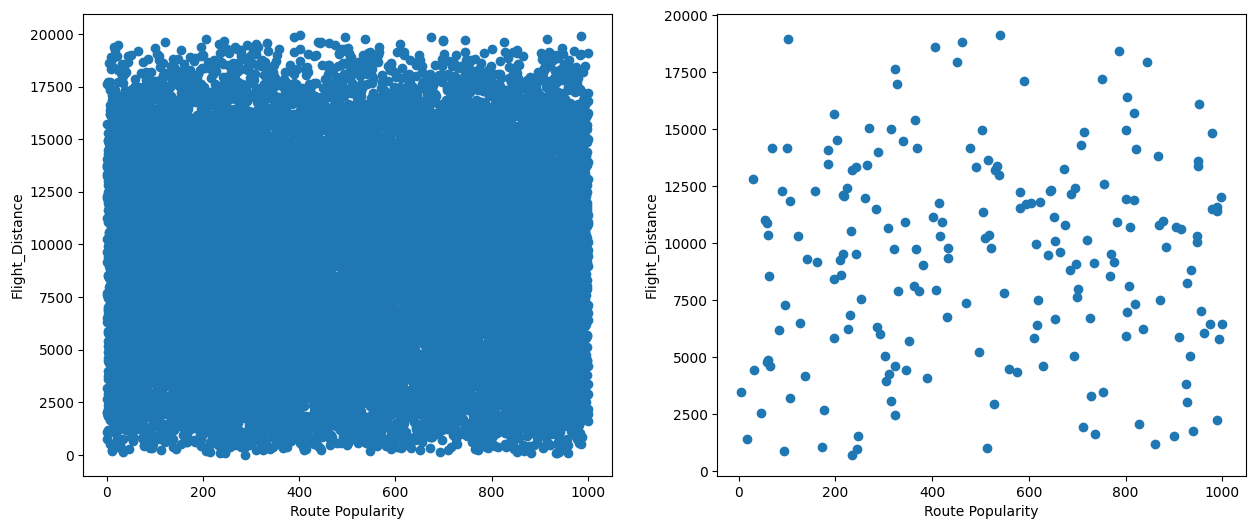

In [78]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(train['Route Popularity'],train['Flight_Distance'])
plt.xlabel('Route Popularity')
plt.ylabel('Flight_Distance')
plt.subplot(1,2,2)
plt.xlabel('Route Popularity')
plt.ylabel('Flight_Distance')
plt.scatter(test['Route Popularity'],y_test)


<Axes: >

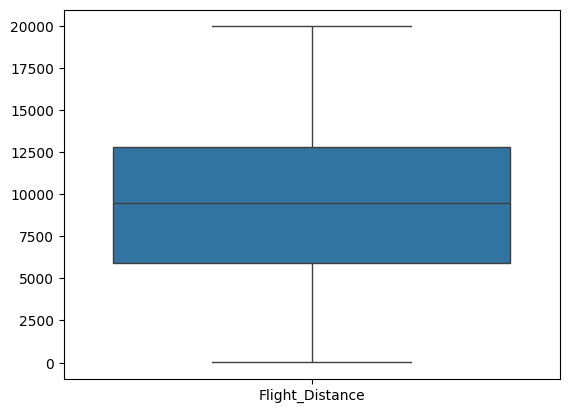

In [22]:
sns.boxplot(data=y_train)

<Axes: >

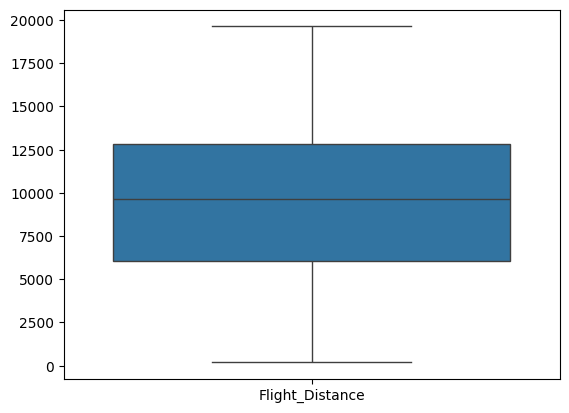

In [23]:
sns.boxplot(data=y_val)

<Axes: >

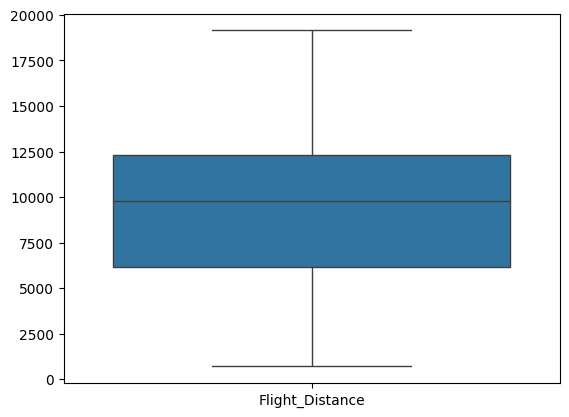

In [24]:
sns.boxplot(data=y_test)

In [19]:
y_test

,Flight_Distance
0,14299.778637
1,10337.476792
2,4155.557996
3,14902.082915
4,9533.197233
...,...
195,12592.704743
196,3270.556663
197,17122.287410
198,4616.255749
